<a href="https://colab.research.google.com/github/BhumikaSongara/DSA_Project/blob/main/imdbSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.datasets import imdb
from keras.preprocessing import sequence

In [ ]:
from keras.preprocessing.sequence import pad_sequences
(X_train, y_train), (X_test,y_test) = imdb.load_data(num_words=5000)

max_review_length = 500
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# Create the model

embedding_vector = 32
model = Sequential()
model.add(Embedding(5000, embedding_vector, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])


In [ ]:
print(model.summary())

model.fit(X_train, y_train, epochs=10, batch_size=64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213301 (833.21 KB)
Trainable params: 213301 (833.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
391/391 [==============================] - 55s 131ms/step - loss: 0.4753 - accuracy: 0.7654
Epoch 2/10
391/391 [==============================] - 25s 64ms/step - loss: 0.2921 - accuracy: 0.8828
Epoch 3/10
391/391 [==============================] - 16s 40ms/step - 

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)

print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.42%


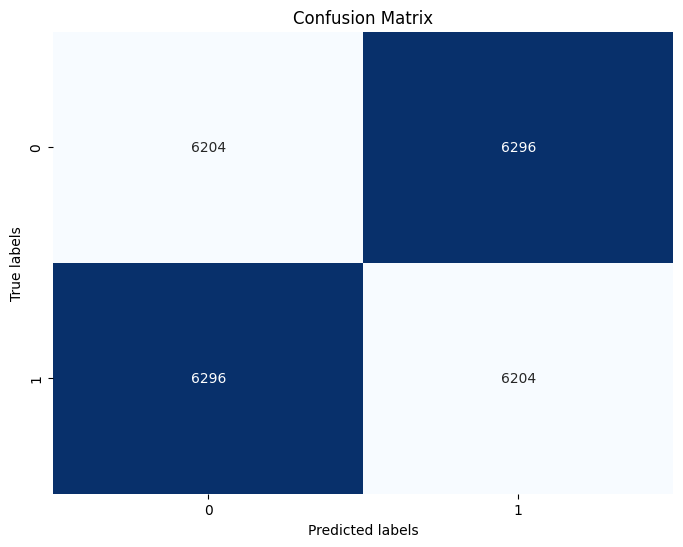

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_train)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()